In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [20]:
spotify_df = pd.read_csv("SpotifyDataset.csv")

source = spotify_df[["danceability", "energy"]]

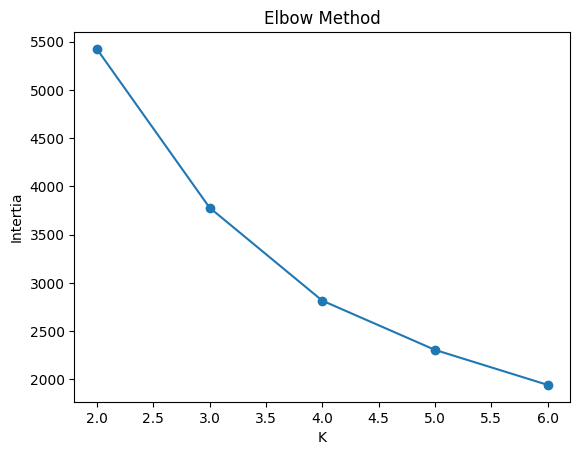

Silhouette Scores: [(2, 0.4414756049199105), (3, 0.3710612623543096), (4, 0.3572042508496221), (5, 0.3680558970959384), (6, 0.35692763080402)]


In [21]:
inertias=[]
silhouettes=[]
for k in range(2,7):
  km = MiniBatchKMeans(n_clusters=k, init='k-means++',
              random_state=0)
  prediction = km.fit_predict(source)
  inertias.append(km.inertia_)
  sl= silhouette_score(source,prediction)
  silhouettes.append((k, sl))


plt.plot(range(2,7), inertias, **{'marker': 'o'})
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Intertia")
plt.show()

print("Silhouette Scores:", silhouettes)

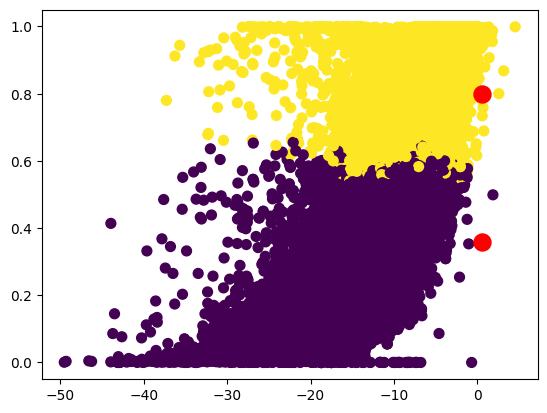

In [29]:
x = np.array(spotify_df['loudness'])
y = np.array(spotify_df['energy'])
km = KMeans(n_clusters=2, init='k-means++',
              random_state=0)
prediction = km.fit_predict(source)
centroids = km.cluster_centers_
plt.scatter(x,y,c=prediction,s=50)
plt.scatter(centroids[:,0],centroids[:,1],
            c='red',s=150)

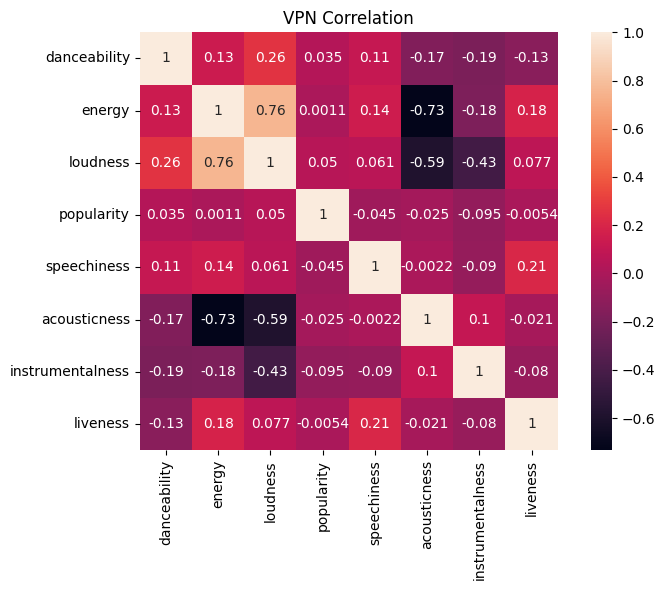

In [25]:
spotify_reduced_df = spotify_df[["danceability", "energy", "loudness", "popularity", "speechiness", "acousticness", "instrumentalness", "liveness"]]
corr = spotify_reduced_df.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,vmax=1,square=True, annot=True)
ax.set_title("VPN Correlation")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
f.tight_layout()

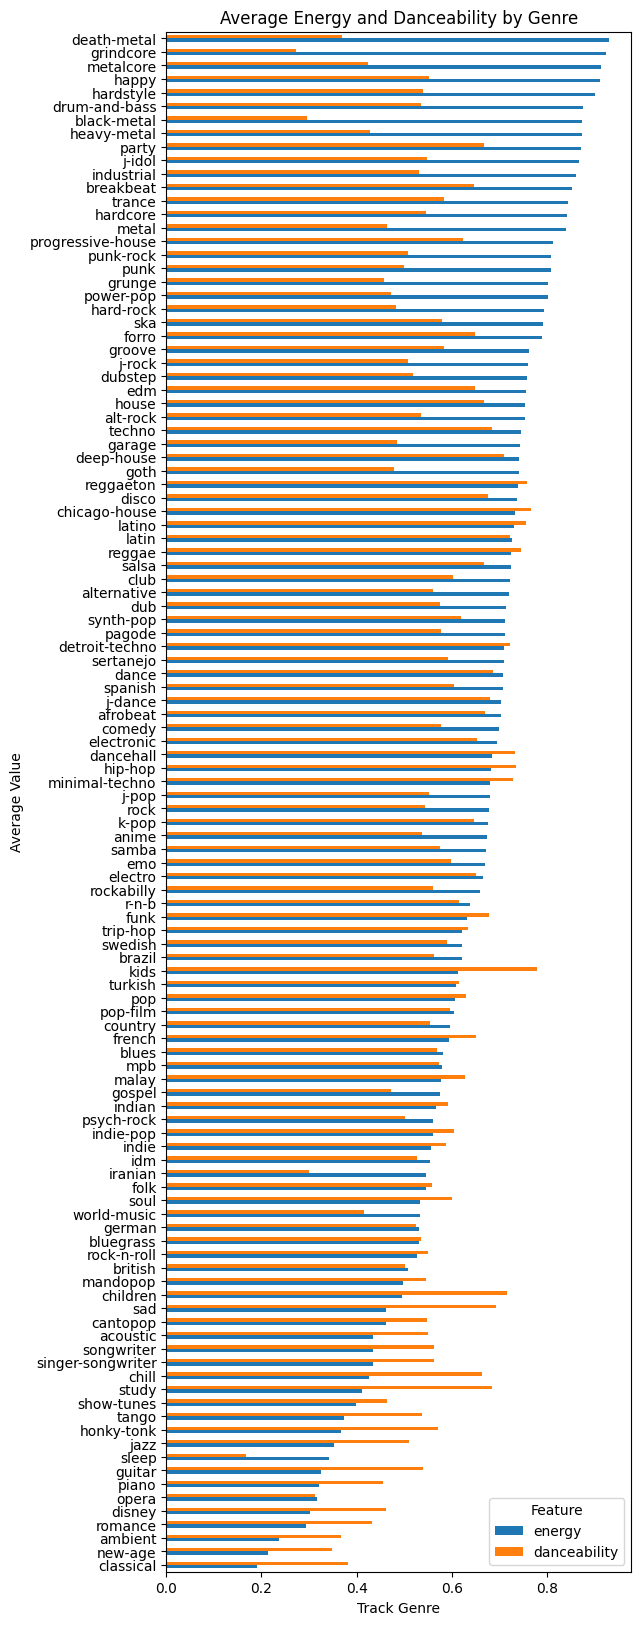

In [ ]:
spotify_avg = spotify_df.groupby("track_genre")[["energy", "danceability"]].mean()

spotify_avg = spotify_avg.sort_values("energy")

spotify_avg.plot(kind="barh", figsize=(6,20))

plt.title("Average Energy and Danceability by Genre")
plt.xlabel("Track Genre")
plt.ylabel("Average Value")
plt.legend(title="Feature")
plt.show()